# Feature Engineering Notebook

## 30-feature-engineering.ipynb
> Goal of notebook: Team will use this notebook during the Ancient Artifacts project to facilitate feature engineering. We will add features that are needed for analysis that are not in our current dataset.

New feature creation of the original Ancient Artifacts datasets. 

In [ ]:
# load modules
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# read data
full_data = pd.read_csv('data/cumulative_data.csv')
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_data.csv')

In [ ]:
# data basics
print(train_data.shape)
print(train_data.columns)

(62890, 42)
Index(['id', 'img_id', 'da', 'dp', 'fwidth', 'flength', 'fthickness',
       'elength', 'ethickness', 'ewidth', 'volume', 'area', 'perimeter',
       'chull_area', 'chull_perimeter', 'sphericity', 'l_t_ratio',
       't_l_aspect_ratio', 'compactness', 'roundness', 'ellipse_ratio',
       'circularity', 'solidity', 'concavity', 'convexity', 'extent', 'hash',
       'transparency', 'curvature', 'surface_area', 'l_w_ratio', 'w_l_ratio',
       'w_t_ratio', 't_w_ratio', 'chull_surface_area', 'sieve', 'angularity',
       'ellipticity', 'fiber_length', 'fiber_width', 'krumbein_rnd',
       'stone_soil'],
      dtype='object')


### Thickness/Volume Interaction

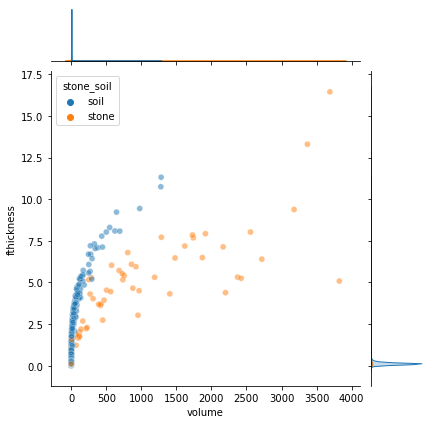

In [ ]:
# visualization
# joint plot of thickness and volume
sns.jointplot(
    data = train_data
    ,y = 'fthickness'
    ,x = 'volume'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [ ]:
# construct thickness volume product
full_data['thick_vol_prod'] = (full_data['fthickness'] * full_data['volume'])
train_data['thick_vol_prod'] = (train_data['fthickness'] * train_data['volume'])
test_data['thick_vol_prod'] = (test_data['fthickness'] * test_data['volume'])

### Thickness/Perimeter Interaction

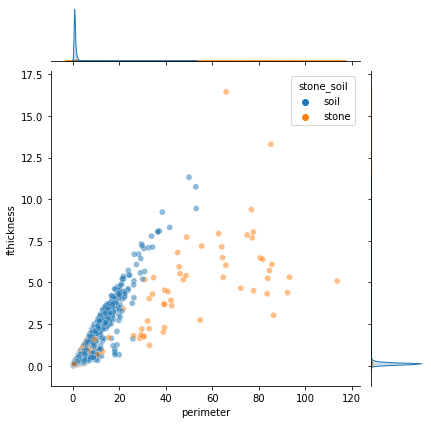

In [ ]:
# visualization
# joint plot of thickness and volume
sns.jointplot(
    data = train_data
    ,y = 'fthickness'
    ,x = 'perimeter'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [ ]:
# construct thickness perimeter product
full_data['thick_perm_prod'] = (full_data['fthickness'] * full_data['perimeter'])
train_data['thick_perm_prod'] = (train_data['fthickness'] * train_data['perimeter'])
test_data['thick_perm_prod'] = (test_data['fthickness'] * test_data['perimeter'])

### Thickness/Transparency

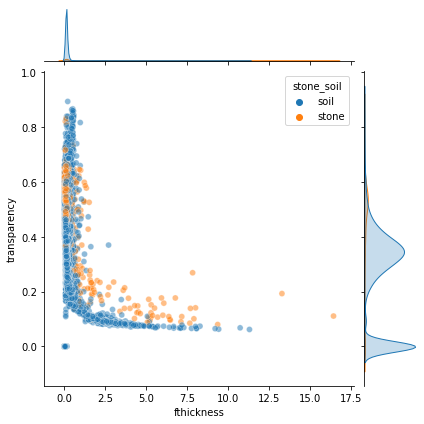

In [ ]:
# visualization
# joint plot of thickness and volume
sns.jointplot(
    data = train_data
    ,x = 'fthickness'
    ,y = 'transparency'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [ ]:
# construct thickness transparency product
full_data['thick_trans_prod'] = (full_data['fthickness'] * full_data['transparency'])
train_data['thick_trans_prod'] = (train_data['fthickness'] * train_data['transparency'])
test_data['thick_trans_prod'] = (test_data['fthickness'] * test_data['transparency'])

### Ellipticity/Roundness

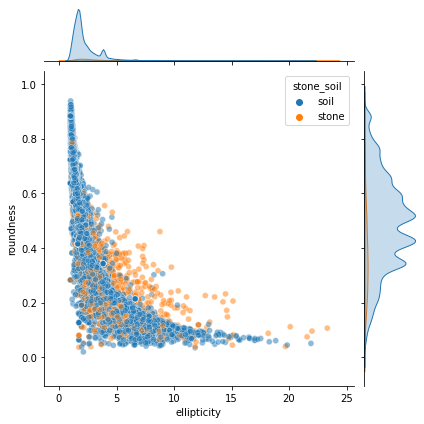

In [ ]:
# visualization
# joint plot of roundness and ellipticity
sns.jointplot(
    data = train_data
    ,y = 'roundness'
    ,x = 'ellipticity'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [ ]:
# construct roundness ellipticity product
full_data['rnd_ell_prod'] = (full_data['roundness'] * full_data['ellipticity'])
train_data['rnd_ell_prod'] = (train_data['roundness'] * train_data['ellipticity'])
test_data['rnd_ell_prod'] = (test_data['roundness'] * test_data['ellipticity'])

In [ ]:
# data basics
print(train_data.shape)
print(train_data.columns)

(62890, 46)
Index(['id', 'img_id', 'da', 'dp', 'fwidth', 'flength', 'fthickness',
       'elength', 'ethickness', 'ewidth', 'volume', 'area', 'perimeter',
       'chull_area', 'chull_perimeter', 'sphericity', 'l_t_ratio',
       't_l_aspect_ratio', 'compactness', 'roundness', 'ellipse_ratio',
       'circularity', 'solidity', 'concavity', 'convexity', 'extent', 'hash',
       'transparency', 'curvature', 'surface_area', 'l_w_ratio', 'w_l_ratio',
       'w_t_ratio', 't_w_ratio', 'chull_surface_area', 'sieve', 'angularity',
       'ellipticity', 'fiber_length', 'fiber_width', 'krumbein_rnd',
       'stone_soil', 'thick_vol_prod', 'thick_perm_prod', 'thick_trans_prod',
       'rnd_ell_prod'],
      dtype='object')


In [ ]:
# write data
# export to csv
full_data.to_csv('data/cumulative_data_fe.csv', index = False)
train_data.to_csv('data/train_data_fe.csv', index = False)
test_data.to_csv('data/test_data_fe.csv', index = False)

Note on possible improvement: It would be be good to create a pipeline or function that accepts to variables as inputs are creates the product variable in our three datasets.